In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name':"4x4",'is_slippery':False}
)
env = gym.make('FrozenLake-v3')

[2017-04-03 04:41:38,692] Making new env: FrozenLake-v3


In [3]:
Q = np.zeros([env.observation_space.n,env.action_space.n])
dis = .99
num_episodes = 2000

rList = []

for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1,env.action_space.n) / (i + 1))
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        state = new_state
        rAll += reward
    rList.append(rAll)

Score over time: 0.9385
Final Q-Table Values
[[ 0.          0.95099005  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.96059601  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.970299    0.        ]
 [ 0.          0.          0.9801      0.        ]
 [ 0.          0.99        0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.        ]]


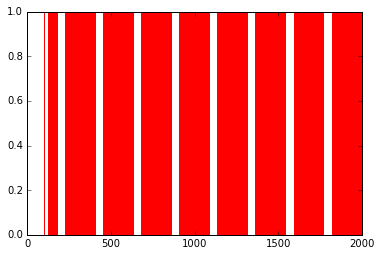

In [4]:
print("Score over time: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="red",edgecolor='none')
plt.show()